# Covid-19 Analyzing Vaccination progress WorldWide

The dataset used for analysis was retreieved from kaggle, we are here trying to find the progress of vaccine distrubution worldwide and the companies reponsible for the same. Here, we have mainly used pandas library and with the help of sets and lists we were able to clean the data and after retreiveing that we were sucessfully able to get graphical visualization of the data. I gained maximum knowledge about data analysis and the functions of pandas and matplotlib library from the course avaialbe at jovian.ai [Data Analysis with Python: Zero to Pandas](zerotopandas.com). 

## Downloading the Dataset

To add the dataset to your project use **opendataset** library for python. Copy the url and download the dataset by providing your username and API key for Kaggle.  

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/gpreda/covid-world-vaccination-progress' 

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [10]:
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"vrajeshpatel0","key":"475674881f39f26c367f8184d44c9677"}'}

In [11]:
 ! mkdir ~/.kaggle

In [12]:
! cp kaggle.json ~/.kaggle/

In [13]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [14]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-05-05 14:54:57           4312  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2488  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            577  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            261  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [15]:
import opendatasets as od
od.download(dataset_url)

100%|██████████| 352k/352k [00:00<00:00, 37.6MB/s]

The dataset has been downloaded and extracted.

In [16]:
# Change this
data_dir = './covid-world-vaccination-progress'

In [17]:
import os
os.listdir(data_dir)

['country_vaccinations_by_manufacturer.csv', 'country_vaccinations.csv']

Let us save and upload our work to Jovian before continuing.

## Data Preparation and Cleaning

The data was collected for government sources availabe online and some information may not be availabe for all the countries that may result in many NaN values which may reduce the accuracy of the analysis. We use isnull function of pandas library to remove the columns with more than 50% NaN values 



In [18]:
import pandas as pd

In [19]:
os.listdir(data_dir)


['country_vaccinations_by_manufacturer.csv', 'country_vaccinations.csv']

In [20]:
covid_world = pd.read_csv('./covid-world-vaccination-progress/country_vaccinations.csv')

#**DataSet**
You can see the raw data retreived form the kaggle API below. It has not been cleaned or used yet. 

In [21]:
covid_world

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15339,Zimbabwe,ZWE,2021-04-30,500342.0,414735.0,85607.0,22745.0,19194.0,3.37,2.79,0.58,1291.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15340,Zimbabwe,ZWE,2021-05-01,520299.0,428135.0,92164.0,19957.0,21171.0,3.50,2.88,0.62,1424.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15341,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,94131.0,3900.0,19169.0,3.53,2.89,0.63,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15342,Zimbabwe,ZWE,2021-05-03,537516.0,437751.0,99765.0,13317.0,17987.0,3.62,2.95,0.67,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...


The description or the significant values for the data can be observed using .describe() fucntion of dataframe

In [22]:
covid_world.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,9.232000e+03,8.565000e+03,6.343000e+03,7.750000e+03,1.514600e+04,9232.000000,8565.000000,6343.000000,15146.000000
mean,5.102427e+06,3.232442e+06,1.621983e+06,1.350742e+05,7.864705e+04,15.758485,11.437242,5.773019,2985.706193
std,2.097440e+07,1.207438e+07,7.026051e+06,5.216573e+05,3.589242e+05,23.427437,15.395539,10.099899,4700.147329
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6.132150e+04,5.287000e+04,2.373450e+04,2.979250e+03,9.080000e+02,1.380000,1.280000,0.640000,351.000000
50%,4.332375e+05,3.348710e+05,1.760680e+05,1.570350e+04,6.442500e+03,6.460000,4.990000,2.420000,1488.000000
75%,1.962930e+06,1.363195e+06,7.009015e+05,6.253675e+04,2.938125e+04,20.210000,15.070000,6.520000,3986.500000
max,2.845950e+08,1.478947e+08,1.061686e+08,1.160100e+07,7.205286e+06,211.080000,111.320000,99.760000,118759.000000


Before clean we need to be sure there is something that may cause problems or miscalculations. If all the values provided below are null or zero we can skip this step.

In [23]:
covid_world.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     6112
people_vaccinated                      6779
people_fully_vaccinated                9001
daily_vaccinations_raw                 7594
daily_vaccinations                      198
total_vaccinations_per_hundred         6112
people_vaccinated_per_hundred          6779
people_fully_vaccinated_per_hundred    9001
daily_vaccinations_per_million          198
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [24]:
def data_cleaner_basic(data):
  for i in data.columns:
    if data[i].isnull().sum() > (0.5 * data.shape[0]):
      data.drop(i,axis=1,inplace=True)


In [25]:
covid_world.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     6112
people_vaccinated                      6779
people_fully_vaccinated                9001
daily_vaccinations_raw                 7594
daily_vaccinations                      198
total_vaccinations_per_hundred         6112
people_vaccinated_per_hundred          6779
people_fully_vaccinated_per_hundred    9001
daily_vaccinations_per_million          198
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [26]:
for i in covid_world.columns:
  if covid_world[i].isnull().sum() > (0.5*covid_world.shape[0]):
    covid_world.drop(i,axis=1,inplace=True)

In [27]:
covid_world.isnull().sum()

country                              0
iso_code                             0
date                                 0
total_vaccinations                6112
people_vaccinated                 6779
daily_vaccinations_raw            7594
daily_vaccinations                 198
total_vaccinations_per_hundred    6112
people_vaccinated_per_hundred     6779
daily_vaccinations_per_million     198
vaccines                             0
source_name                          0
source_website                       0
dtype: int64

In [28]:
data_cleaner_basic(covid_world)

In [29]:
covid_world

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,0.00,0.00,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15339,Zimbabwe,ZWE,2021-04-30,500342.0,414735.0,22745.0,19194.0,3.37,2.79,1291.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15340,Zimbabwe,ZWE,2021-05-01,520299.0,428135.0,19957.0,21171.0,3.50,2.88,1424.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15341,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,3900.0,19169.0,3.53,2.89,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15342,Zimbabwe,ZWE,2021-05-03,537516.0,437751.0,13317.0,17987.0,3.62,2.95,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...


In [30]:
type(covid_world)

pandas.core.frame.DataFrame

As we can observe below the data has been cleaned as we removed all the columns with more than 50% NaN or Null values 

In [31]:
covid_world

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,0.00,0.00,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15339,Zimbabwe,ZWE,2021-04-30,500342.0,414735.0,22745.0,19194.0,3.37,2.79,1291.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15340,Zimbabwe,ZWE,2021-05-01,520299.0,428135.0,19957.0,21171.0,3.50,2.88,1424.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15341,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,3900.0,19169.0,3.53,2.89,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15342,Zimbabwe,ZWE,2021-05-03,537516.0,437751.0,13317.0,17987.0,3.62,2.95,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...


In [32]:
covid_world['country'] = covid_world.country

In [33]:
covid_world

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,0.00,0.00,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,1367.0,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15339,Zimbabwe,ZWE,2021-04-30,500342.0,414735.0,22745.0,19194.0,3.37,2.79,1291.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15340,Zimbabwe,ZWE,2021-05-01,520299.0,428135.0,19957.0,21171.0,3.50,2.88,1424.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15341,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,3900.0,19169.0,3.53,2.89,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...
15342,Zimbabwe,ZWE,2021-05-03,537516.0,437751.0,13317.0,17987.0,3.62,2.95,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...


In [34]:
covid_world.set_index(keys=['country'], drop=False,inplace=True)
names=covid_world['country'].unique().tolist()

li = list()

for i in range(0,len(names)):
  li.append(covid_world.loc[names[i]])

In [35]:
import jovian

## Exploratory Analysis and Visualization

Let's plot some GRAPHS !! 


Exploratory analysis helps in viewing the tabular data in a much better and human friendly way. Its much better to view different coloured graphs rather than trying to understand numbers. Let's get started shall we ?

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [37]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Wonder which are the leading countries in the vaccination process ? Let's visualize it 


### **Q.**  Top 10 countries worldwide with best access to Covid-19 vaccination 

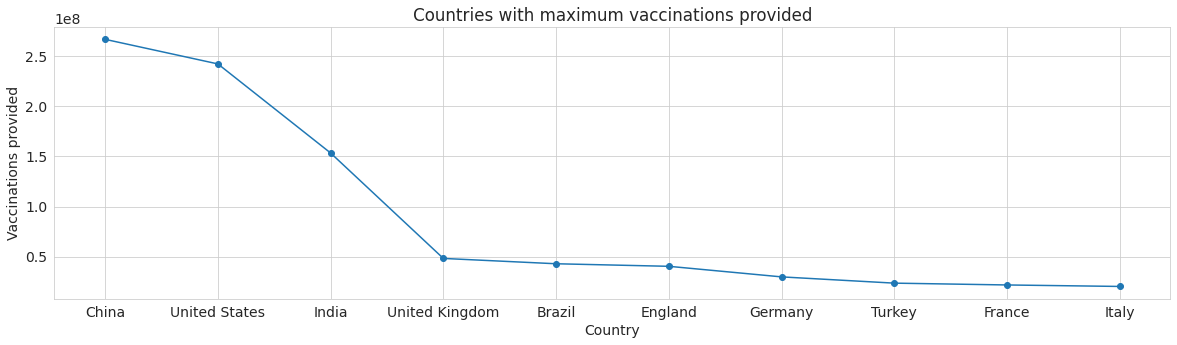

In [146]:
top_access_countries = covid_world.groupby(covid_world.index).daily_vaccinations.sum().sort_values(ascending = False).head(10)

######################################################### Plot 1 ##########################################################

plt.figure(figsize=(20,5))
plt.xlabel('Country')
plt.ylabel('Vaccinations provided')
plt.title('Countries with maximum vaccinations provided')
plt.plot(top_access_countries,marker='o')

######################################################### Plot 2 ##########################################################

fig = px.line(top_access_countries, x=top_access_countries.index, y="daily_vaccinations", color=top_access_countries.index, title="Countries with maximum vaccinations provided")
fig.update_traces(mode="markers+lines")

###########################################################################################################################

fig.show()

United States getting the most vaccinations provided. Well the conditions there are the most severe as well and thus this way we could ensure that the conditions will get better relatively soon. 

Let's find out how many people are getting vaccinated on daily basis in every country. We will not analyze every country though as the graph might get a little confusing and we would not able to get much inforomation from it. So let's view the top 10 countries. 

**Q.** The growth in number of vaccinations daily availabe for every country

In [39]:
import numpy as np 

def plot_variation(df,feature,title,countries):
    """
    Plot the graphs of number of daily vaccinations in all countries in our dataframe.

    Parameters
    ----------
    df        : pd.DataFrame
    feature   : str
    title     : str
    countries : list

    Returns
    ------- 
    Graph
    """
    #################### Plot 1 ##################
    n=1000000
    data = []
    for country in countries:
      datafile = df.loc[df.country == country]
      trace = go.Scatter(
              x = datafile['date'],y = datafile[feature],
              name=country,
              mode = "markers+lines",
              marker_line_width = 1,
              marker_size = 8,
              marker_symbol = 'circle',
              text=datafile['country'],)
      data.append(trace)
    fig = dict(data=data)
    iplot(fig, filename='all_countries')
    ##############################################

In [40]:
names=covid_world['country'].unique().tolist()
plot_variation(covid_world, 'daily_vaccinations', 'Total vaccination percent evolution (selected countries, log scale)', names)

Let's view the top 40 countries with the highest mean vaccination per million.

**Q.** Top 40 countries with highest mean vaccination per million

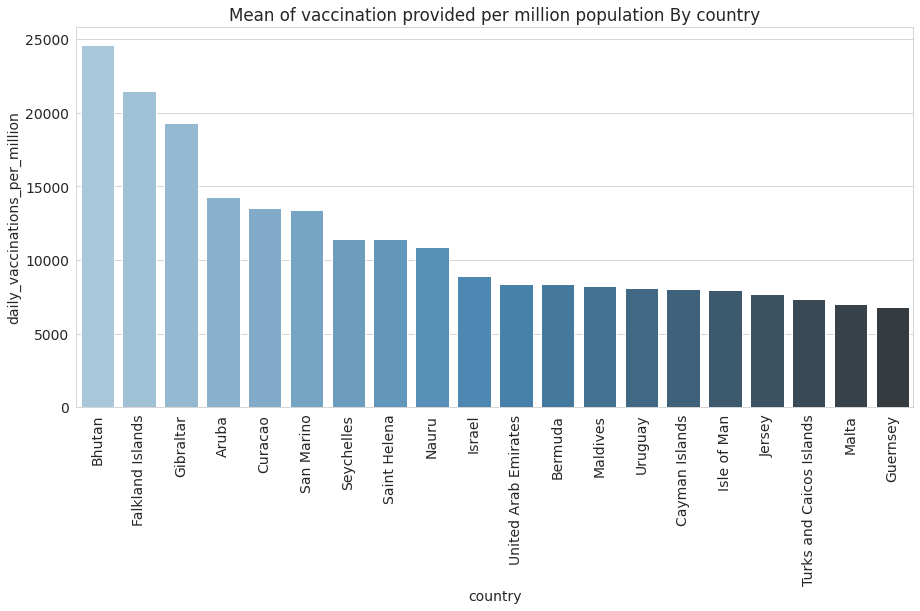

In [126]:
################################################## Plot 1 #####################################################

mean_vacc_per_mill = covid_world.groupby(covid_world.index).mean().sort_values(by='daily_vaccinations_per_million',ascending=False)
fig,ax=plt.subplots(figsize=(15,7))
plt.title('Mean of vaccination provided per million population By country')
plt.xticks(rotation=90)
sns.barplot(x=mean_vacc_per_mill.head(20).index,y=mean_vacc_per_mill['daily_vaccinations_per_million'].head(20), palette="Blues_d")

###############################################################################################################

We could see that the countries with the less amount of population are much ahead as they should be. Providing the bigger population size coutries is still a work in progress and will be quite a tough task. But yeah , the governments are working on it and we will soon achieve it. 

**Q.** The sum of all the vaccinations availabe daily worldwide representing the top 20 days when maximum people were vaccinated.

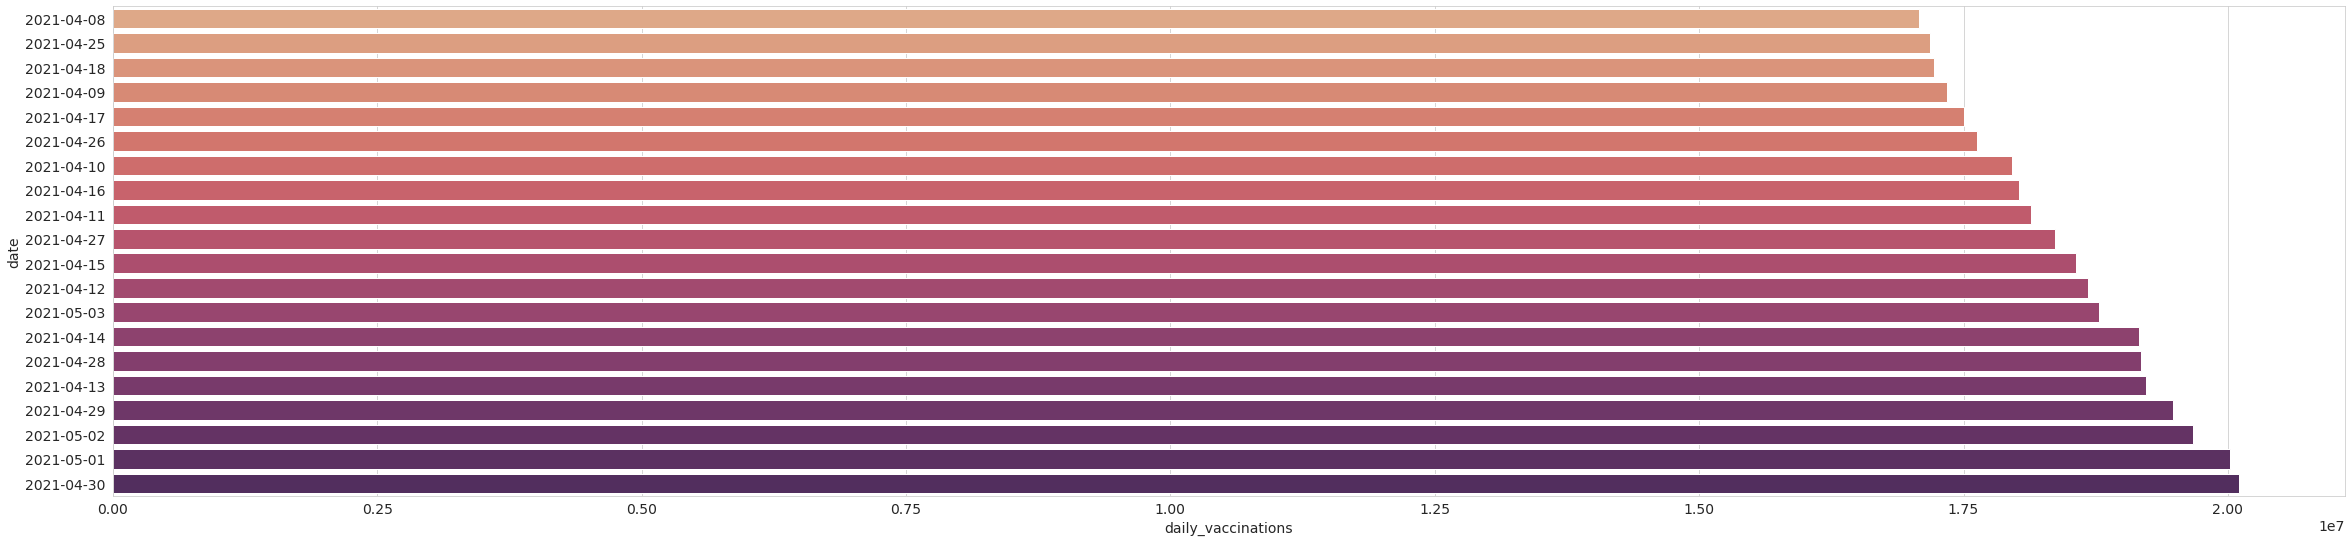

In [137]:
################################################## Plot 1 #####################################################

covid_inc = covid_world.groupby('date').daily_vaccinations.sum().sort_values()
doses_inc = covid_inc.tail(20)
plt.figure(figsize=(40,9))
sns.barplot(x=doses_inc,y=doses_inc.index, palette="flare")

###############################################################################################################

So the highest number of vaccinations were done on the 7th of Feb. The rates are increasing and the numbers will soon reach newer heights. 

Let's check out now the daily vaccinations provided by each company, this way we could find out who are the top suppliers of the vaccine. 

**Q.** - The number of vaccinations provided by each company worldwide and the company serving maximum number of countries respectively 

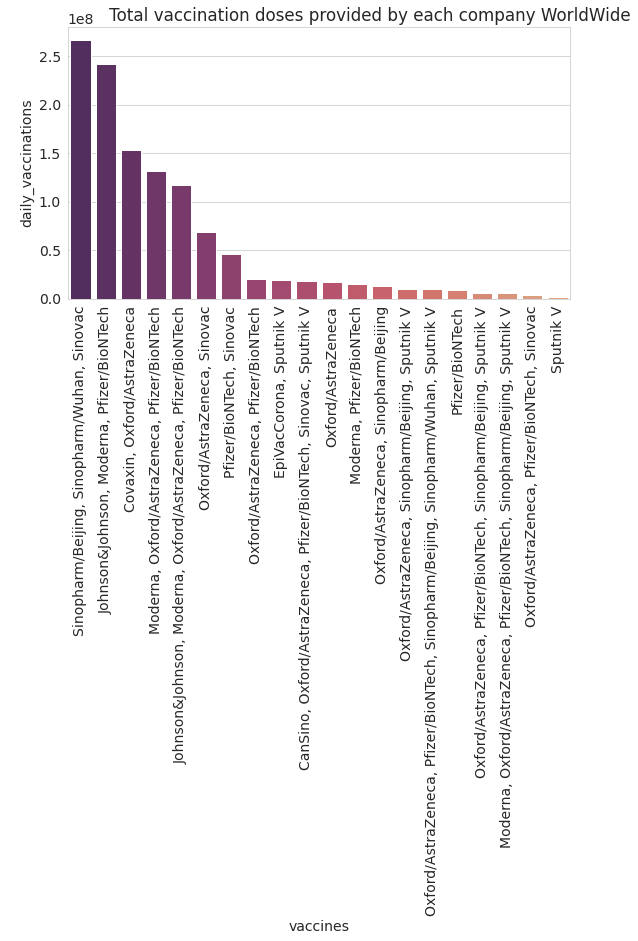

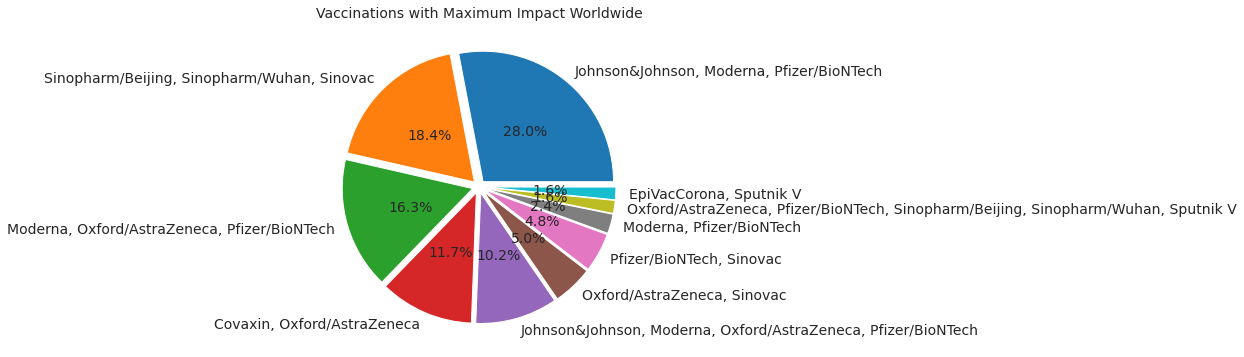

In [138]:
################################################# Plot 1 ############################################################

vaccines_per_company = covid_world.groupby('vaccines').sum()
vaccines_per_company_total = vaccines_per_company.sort_values(by='daily_vaccinations', ascending=False)
plt.xticks(rotation=90)
sns.set_style('whitegrid')
plt.title('                   Total vaccination doses provided by each company WorldWide')
sns.barplot(x=vaccines_per_company_total.head(20).index,y=vaccines_per_company_total.head(20).daily_vaccinations, palette="flare_r")

################################################## Plot 2 #############################################################

vaccines_per_company = vaccines_per_company.sort_values(by = 'total_vaccinations', ascending=False)
pie, ax = plt.subplots(figsize=[10,6])
labels = vaccines_per_company.index
labels = labels[:10]
plt.pie(x=vaccines_per_company['total_vaccinations'].head(10), autopct="%.1f%%", explode=[0.05]*10, labels=labels, pctdistance=0.5, startangle=0)
plt.title("Vaccinations with Maximum Impact Worldwide", fontsize=14)
pie.savefig("Top_Companies_Max_Impact.png")

#########################################################################################################################

Now let's checkout which medical firm is serving to how many countries. This way we could analyze the pressure the companies are facing as they need to manufacture an enormous amount of vaccines and serve to different nations. 

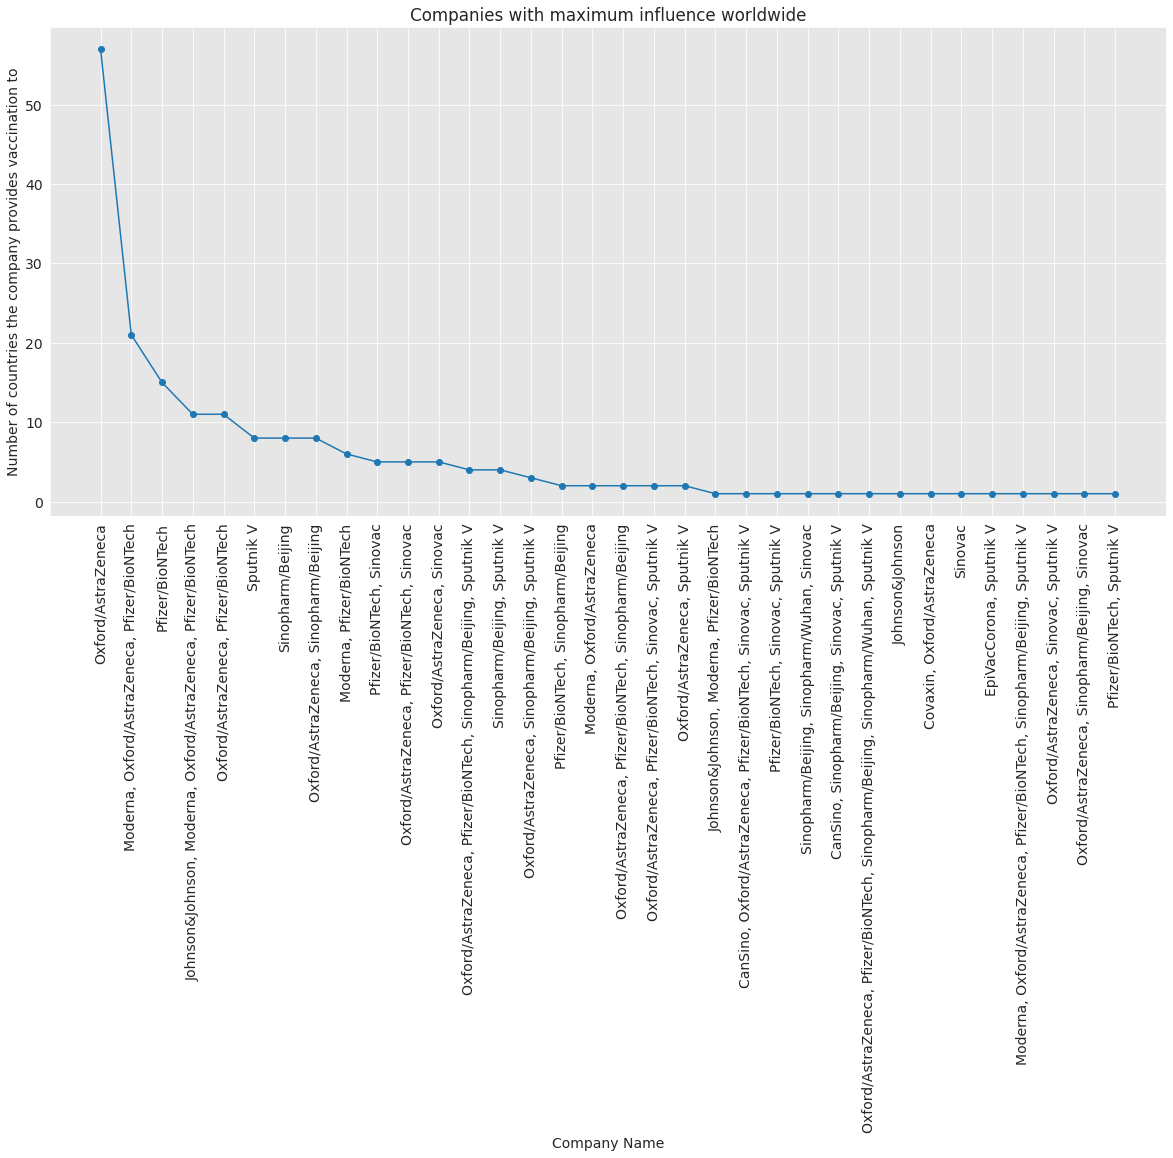

In [44]:
############################################ Get Data Required #########################################

vaccines_per_company_count = covid_world.groupby(by=covid_world.columns, axis=1).sum()
new_covid_world = covid_world.drop(columns=['country'],axis=1)

vaccines_per_country_count = new_covid_world.groupby('country')['vaccines'].apply(frozenset).reset_index()
val = vaccines_per_country_count['vaccines'].value_counts()

vaccines_per_country_count = vaccines_per_country_count['vaccines'].value_counts().sort_values()
val1 = pd.DataFrame(list(val), columns=['vaccine'])

sets = val.index
new_list = ([list(x) for x in sets])

df = pd.DataFrame(new_list,columns=['company_name'])
val1['company_name'] = df

################################################## Plot 1 #####################################################

plt.figure(figsize=(20,9))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.title('Companies with maximum influence worldwide')
plt.ylabel('Number of countries the company provides vaccination to')
plt.xlabel('Company Name')
plt.xticks(rotation=90)
plt.plot(val1.company_name,val1.vaccine,marker='o')

################################################################################################################

## Asking and Answering Questions



#### **Q1**: Top 10 countries with the access to the vaccination

Here, we get the sum of the covid vaccination doses provided in each country and get the top 10 countries where maximum doses were delivered till the date.

In [46]:
top_access_countries = covid_world.groupby(covid_world.index).daily_vaccinations.sum().sort_values(ascending = False).head(10)

In [47]:
top_access_countries

country
China             266587645.0
United States     242098893.0
India             153329553.0
United Kingdom     48283246.0
Brazil             42971303.0
England            40429248.0
Germany            29888989.0
Turkey             23655622.0
France             21843449.0
Italy              20363649.0
Name: daily_vaccinations, dtype: float64

#### **Q2**: Increase in daily vaccination count in top 10 countries with max vaccination count 

We firstly use the data distribute the data grouped by country into a lists of dataframes and then we calculate the sum and distribute our data according. As a result we get rate of increase in covid doses for the countries with maximum doses distributed. 

In [48]:
import numpy as np 

def get_variation(df,feature,countries):
  data = []
  for country in countries:
    datafile = df.loc[df.country == country]
    trace = [datafile['date'],datafile[feature]]
    data.append(trace)
  return data

In [49]:
country_names = covid_world['country'].unique().tolist()
result_variations = get_variation(covid_world,'daily_vaccinations',country_names)

In [50]:
result_variations

[[country
  Afghanistan    2021-02-22
  Afghanistan    2021-02-23
  Afghanistan    2021-02-24
  Afghanistan    2021-02-25
  Afghanistan    2021-02-26
  Afghanistan    2021-02-27
  Afghanistan    2021-02-28
  Afghanistan    2021-03-01
  Afghanistan    2021-03-02
  Afghanistan    2021-03-03
  Afghanistan    2021-03-04
  Afghanistan    2021-03-05
  Afghanistan    2021-03-06
  Afghanistan    2021-03-07
  Afghanistan    2021-03-08
  Afghanistan    2021-03-09
  Afghanistan    2021-03-10
  Afghanistan    2021-03-11
  Afghanistan    2021-03-12
  Afghanistan    2021-03-13
  Afghanistan    2021-03-14
  Afghanistan    2021-03-15
  Afghanistan    2021-03-16
  Afghanistan    2021-03-17
  Afghanistan    2021-03-18
  Afghanistan    2021-03-19
  Afghanistan    2021-03-20
  Afghanistan    2021-03-21
  Afghanistan    2021-03-22
  Afghanistan    2021-03-23
  Afghanistan    2021-03-24
  Afghanistan    2021-03-25
  Afghanistan    2021-03-26
  Afghanistan    2021-03-27
  Afghanistan    2021-03-28
  Afghanis

In [51]:
result_variations[0]

[country
 Afghanistan    2021-02-22
 Afghanistan    2021-02-23
 Afghanistan    2021-02-24
 Afghanistan    2021-02-25
 Afghanistan    2021-02-26
 Afghanistan    2021-02-27
 Afghanistan    2021-02-28
 Afghanistan    2021-03-01
 Afghanistan    2021-03-02
 Afghanistan    2021-03-03
 Afghanistan    2021-03-04
 Afghanistan    2021-03-05
 Afghanistan    2021-03-06
 Afghanistan    2021-03-07
 Afghanistan    2021-03-08
 Afghanistan    2021-03-09
 Afghanistan    2021-03-10
 Afghanistan    2021-03-11
 Afghanistan    2021-03-12
 Afghanistan    2021-03-13
 Afghanistan    2021-03-14
 Afghanistan    2021-03-15
 Afghanistan    2021-03-16
 Afghanistan    2021-03-17
 Afghanistan    2021-03-18
 Afghanistan    2021-03-19
 Afghanistan    2021-03-20
 Afghanistan    2021-03-21
 Afghanistan    2021-03-22
 Afghanistan    2021-03-23
 Afghanistan    2021-03-24
 Afghanistan    2021-03-25
 Afghanistan    2021-03-26
 Afghanistan    2021-03-27
 Afghanistan    2021-03-28
 Afghanistan    2021-03-29
 Afghanistan    202

#### **Q3**: Countries with highest mean vaccination per million on daily basis

To acheive our goal we group our data by country and then sort the mean of daily vaccinations per million. As a result we get the countries that are fastest in distributing the vaccines compared to the population of the country. 

In [52]:
mean_vacc_per_mill = covid_world.groupby(covid_world.index).mean().sort_values(by='daily_vaccinations_per_million',ascending=False)

In [53]:
mean_vacc_per_mill

,total_vaccinations,people_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,
Bhutan,434316.743590,434316.743590,12986.432432,19009.692308,56.286410,56.286410,24636.333333
Falkland Islands,2360.500000,1778.500000,NaN,74.742424,67.773333,51.063333,21459.424242
Gibraltar,36134.440860,21890.935484,757.768293,649.459459,107.252796,64.975699,19276.972973
Aruba,60492.409091,43608.090909,1949.764706,1526.194444,56.657727,40.844545,14294.805556
Curacao,64928.566667,49978.866667,2478.040000,2223.833333,39.566000,30.457333,13551.694444
...,...,...,...,...,...,...,...
Congo,14297.000000,14297.000000,NaN,NaN,0.260000,0.260000,NaN
Djibouti,10246.000000,10246.000000,NaN,NaN,1.040000,1.040000,NaN
Libya,750.000000,750.000000,NaN,NaN,0.010000,0.010000,NaN


#### **Q4**: Top 20 days with most doses provided worldwide 

We find out the days most doses were delivered worldwide by grouping our data by date and obtaining to sum of daily vaccinations.

In [54]:
covid_inc = covid_world.groupby('date').daily_vaccinations.sum().sort_values()

In [55]:
doses_inc = covid_inc.tail(20)

In [56]:
doses_inc

date
2021-04-08    17081416.0
2021-04-25    17183232.0
2021-04-18    17219713.0
2021-04-09    17340083.0
2021-04-17    17501731.0
2021-04-26    17623910.0
2021-04-10    17956733.0
2021-04-16    18027916.0
2021-04-11    18133931.0
2021-04-27    18368325.0
2021-04-15    18565584.0
2021-04-12    18677440.0
2021-05-03    18780810.0
2021-04-14    19154788.0
2021-04-28    19178107.0
2021-04-13    19227564.0
2021-04-29    19476286.0
2021-05-02    19672768.0
2021-05-01    20021314.0
2021-04-30    20100633.0
Name: daily_vaccinations, dtype: float64

#### **Q5**: Maximum vaccination provided by companies and the companies facilitating most countries to fight this global battle 

Firstly, we group our data by vaccines and calculate sum of daily_vaccinations. As a result we get the sum of vaccines provided by each compnay. Moreover, we find the companies delivering the doses to each countries listed below and then we count the total countries each company delivers doses to. Thereby we obtain the top companies facilitating most of the countries to help fight this battle.

In [57]:
vaccines_per_company = covid_world.groupby('vaccines').sum()
vaccines_per_company_total = vaccines_per_company.sort_values(by='daily_vaccinations', ascending=False)
vaccines_per_company_count = covid_world.groupby(by=covid_world.columns, axis=1).sum()

In [60]:
vaccines_per_company_count

,country,daily_vaccinations,daily_vaccinations_per_million,daily_vaccinations_raw,date,iso_code,people_vaccinated,people_vaccinated_per_hundred,source_name,source_website,total_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,,,,,,,
Afghanistan,Afghanistan,0.0,0.0,0.0,2021-02-22,AFG,0.0,0.00,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,0.0,0.00,Oxford/AstraZeneca
Afghanistan,Afghanistan,1367.0,35.0,0.0,2021-02-23,AFG,0.0,0.00,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,0.0,0.00,Oxford/AstraZeneca
Afghanistan,Afghanistan,1367.0,35.0,0.0,2021-02-24,AFG,0.0,0.00,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,0.0,0.00,Oxford/AstraZeneca
Afghanistan,Afghanistan,1367.0,35.0,0.0,2021-02-25,AFG,0.0,0.00,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,0.0,0.00,Oxford/AstraZeneca
Afghanistan,Afghanistan,1367.0,35.0,0.0,2021-02-26,AFG,0.0,0.00,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,0.0,0.00,Oxford/AstraZeneca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,Zimbabwe,19194.0,1291.0,22745.0,2021-04-30,ZWE,414735.0,2.79,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...,500342.0,3.37,Sinopharm/Beijing
Zimbabwe,Zimbabwe,21171.0,1424.0,19957.0,2021-05-01,ZWE,428135.0,2.88,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...,520299.0,3.50,Sinopharm/Beijing
Zimbabwe,Zimbabwe,19169.0,1290.0,3900.0,2021-05-02,ZWE,430068.0,2.89,Ministry of Health,https://twitter.com/MoHCCZim/status/1389675251...,524199.0,3.53,Sinopharm/Beijing


In [61]:
new_covid_world = covid_world.drop(columns=['country'],axis=1)
vaccines_per_country_count = new_covid_world.groupby('country')['vaccines'].apply(frozenset).reset_index()

val = vaccines_per_country_count['vaccines'].value_counts()
vaccines_per_country_count = vaccines_per_country_count['vaccines'].value_counts().sort_values()

In [62]:
val1 = pd.DataFrame(list(val), columns=['vaccine'])
sets = val.index
new_list = ([list(x) for x in sets])
df = pd.DataFrame(new_list, columns=['company_name'])
val1['company_name'] =df

In [68]:
val1

,vaccine,company_name
0,57,Oxford/AstraZeneca
1,21,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
2,15,Pfizer/BioNTech
3,11,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
4,11,"Oxford/AstraZeneca, Pfizer/BioNTech"
5,8,Sputnik V
6,8,Sinopharm/Beijing
7,8,"Oxford/AstraZeneca, Sinopharm/Beijing"
8,6,"Moderna, Pfizer/BioNTech"
9,5,"Pfizer/BioNTech, Sinovac"


## Inferences and Conclusion

Analyzing the data set of Covid 19 vaccination provided worldwide we did a thorough analysis of the speed of vaccinations availability worldwide. It is clearly visible that United States had the highest number of doses distributed but when it comes to the ratio of number of doses vs the population we can observe that United States is not in the lead. Analyzing the number of doses delivered by different companies we can say Pfizer and BioNTech togather are supporting over 40 countries by providing over 50 million vaccinations doses worldwide. The data set can be improved if we can find the number of increase in the production rate of vaccination. But we have sufficient data to form a linear regression model to predict the future trend of doses avaibility. 

## References and Future Work

Dataset https://www.kaggle.com/gpreda/covid-world-vaccination-progress

Other helpful sources
  Stack Overflow  
  https://stackoverflow.com/questions/36392735/how-to-combine-multiple-rows-into-a-single-row-with-pandas  
  https://www.kaggle.com/mrinalchandramishra/predicting-vaccination-done-in-future 
  
  https://www.kaggle.com/gpreda/covid-19-vaccination-progress